In [1]:
! pip install qiskit[visualization]==0.46.2
! pip install qiskit-aer==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=11075072d9aeb125b0bc6009859f1dc67e37e780f7d3bff31f99bbd9eb8e3b79
  Stored in directory: /root/.cache/pip/wheels/d3

In [2]:
!pip install qiskit-machine-learning==0.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512545 sha256=353fc7f3609c8ad67ad4dee7ef19c2db595948fd8ba11423d36df894c4f6174c
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [3]:
#!pip install pylatexenc

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, GradientDescent
from qiskit_machine_learning.algorithms.classifiers import VQC

import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

algorithm_globals.random_seed = 42

<ipython-input-33-10e282ffc84b>:14: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0 release. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 42


In [34]:
#holds execution and backend configs
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), shots=1024)

<ipython-input-34-aba5d9ef7ae2>:2: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), shots=1024)


## 1. Create simple dataset


<ipython-input-77-aa7a41859070>:5: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0 release. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1


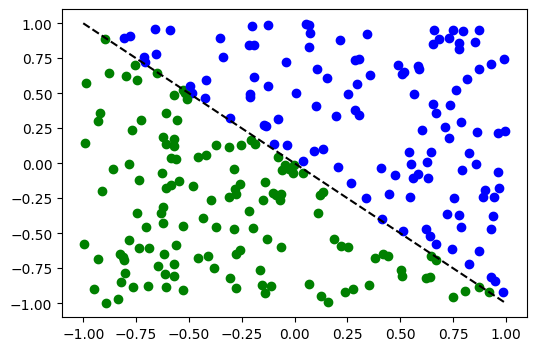

In [77]:
num_inputs = 2
num_samples = 250


X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}

#convert to one hot
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1


for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()



In [78]:
X.shape, y_one_hot.shape

((250, 2), (250, 2))

In [79]:
from sklearn.model_selection import train_test_split


x_train,  x_test,  y_train, y_test = train_test_split(X,y_one_hot, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((200, 2), (50, 2), (200, 2), (50, 2))

In [80]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()



## 2. Construct Classifier

In [81]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, reps=4)

# construct variational quantum classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=COBYLA(), #https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html
    quantum_instance=quantum_instance,
    callback=callback_graph,
)



/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


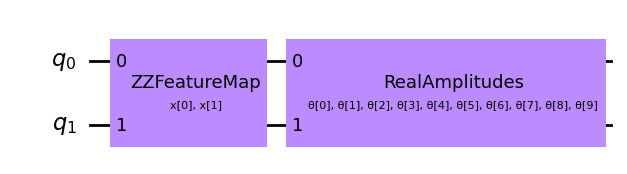

In [82]:
# construct quantum circuit (just for illustration)
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))
qc.decompose().draw('mpl')

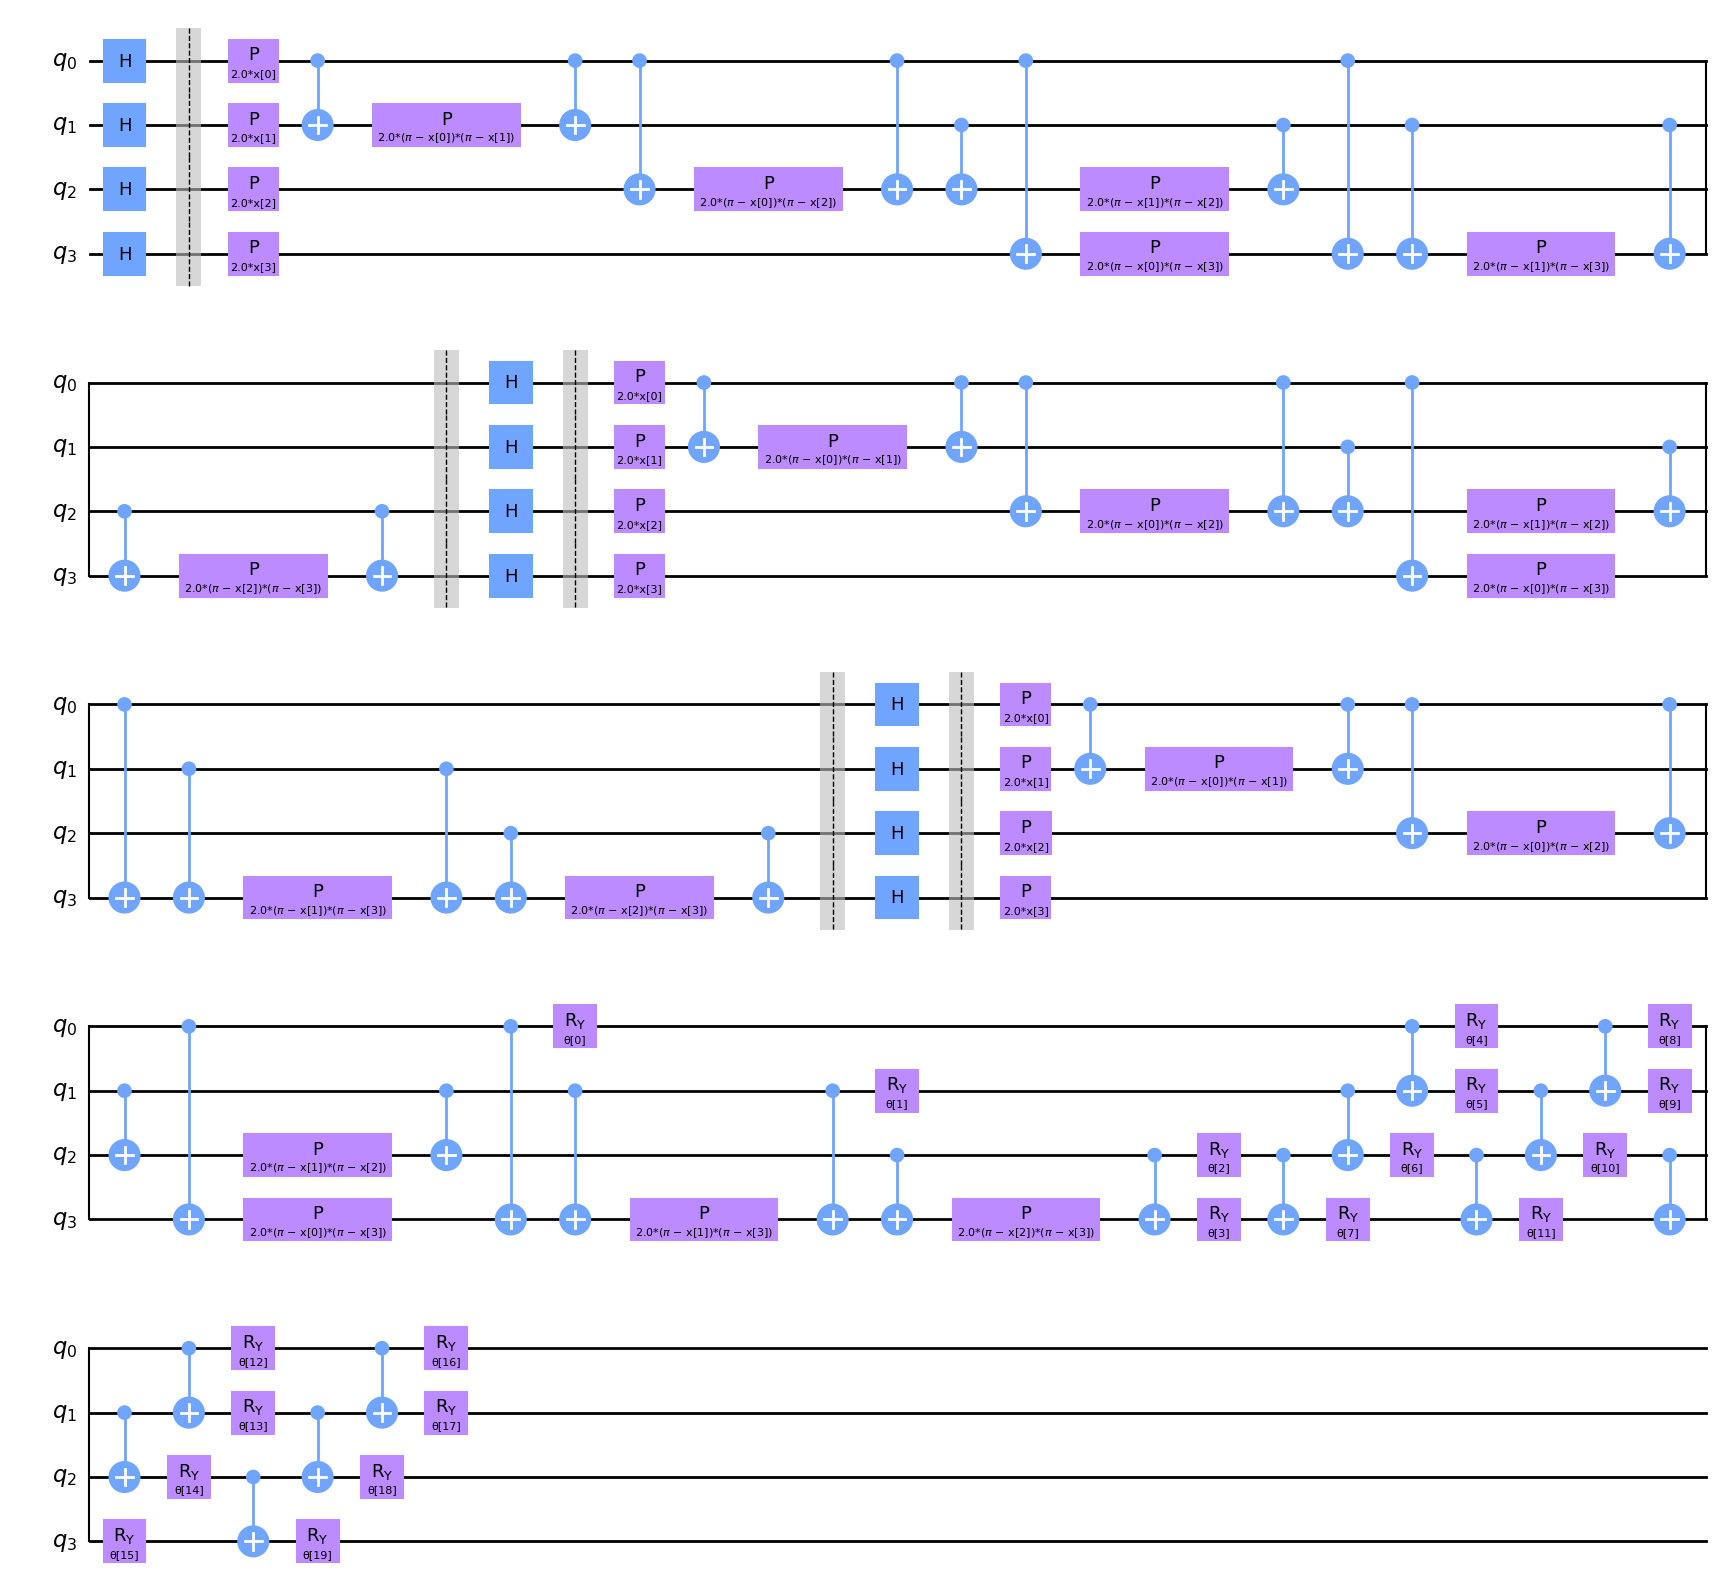

In [83]:

feature_map = ZZFeatureMap(feature_dimension=4, reps=3, insert_barriers=True)
ansatz = RealAmplitudes(4, reps=4)


circuit = feature_map.compose(ansatz) #DEPRECATED - combnine to compose
circuit.decompose().draw(output='mpl')

## 3. Fit Classifier

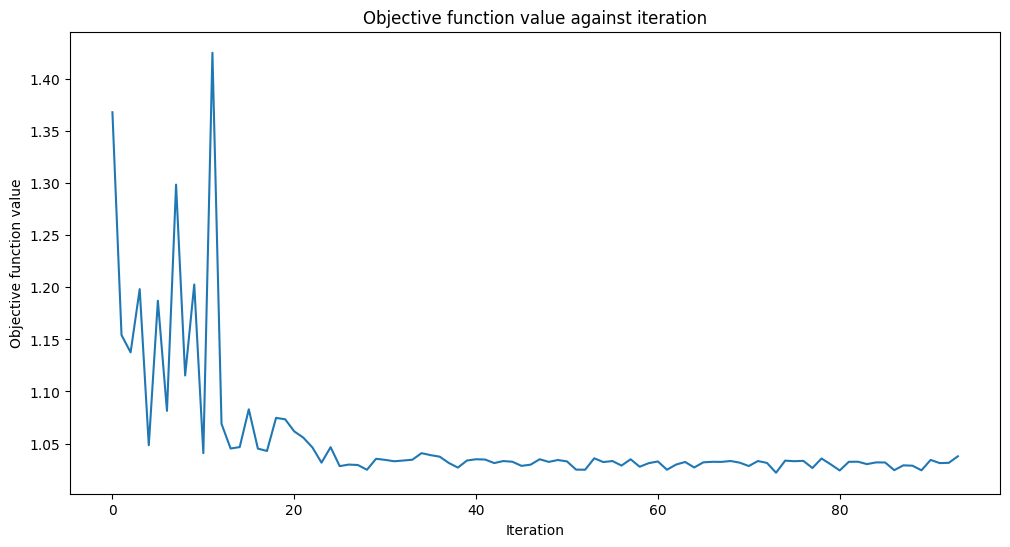

0.53

In [84]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(x_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(x_train, y_train)



## 4. Test


In [85]:
vqc.score(x_test, y_test)


0.52

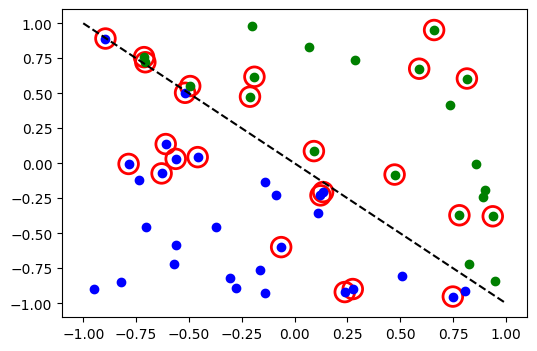

In [86]:
# evaluate data points
y_predict = vqc.predict(x_test)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(x_test, y_test, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()



## IRIS Classification


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [130]:
x, y = load_iris(as_frame=True, return_X_y=True)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [132]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((112, 4), (38, 4), (112,), (38,))

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [134]:
y_onehot = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

In [135]:
y_onehot.shape

(112, 3)

In [136]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()



https://github.com/AbhiSR4/VQC-Qiskit-Fallfest/blob/main/NQSVC.ipynb for more about SVC Quantum Classifier

In [137]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(4)
ansatz = RealAmplitudes(4, reps=5)

# construct variational quantum classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=COBYLA(), #https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html
    quantum_instance=quantum_instance,
    callback=callback_graph,
)



/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


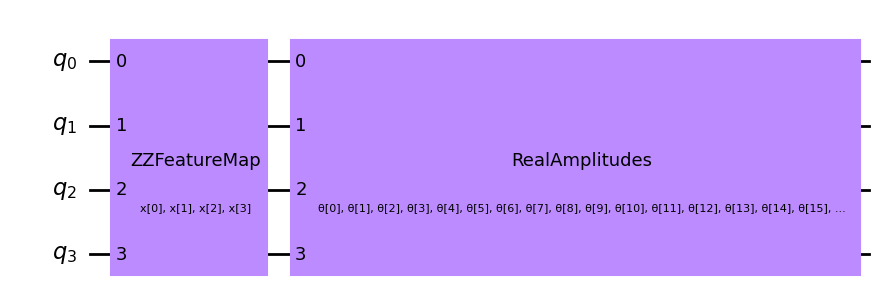

In [138]:
# construct quantum circuit (just for illustration)
qc = QuantumCircuit(4)
qc.append(feature_map, range(4))
qc.append(ansatz, range(4))
qc.decompose().draw('mpl')

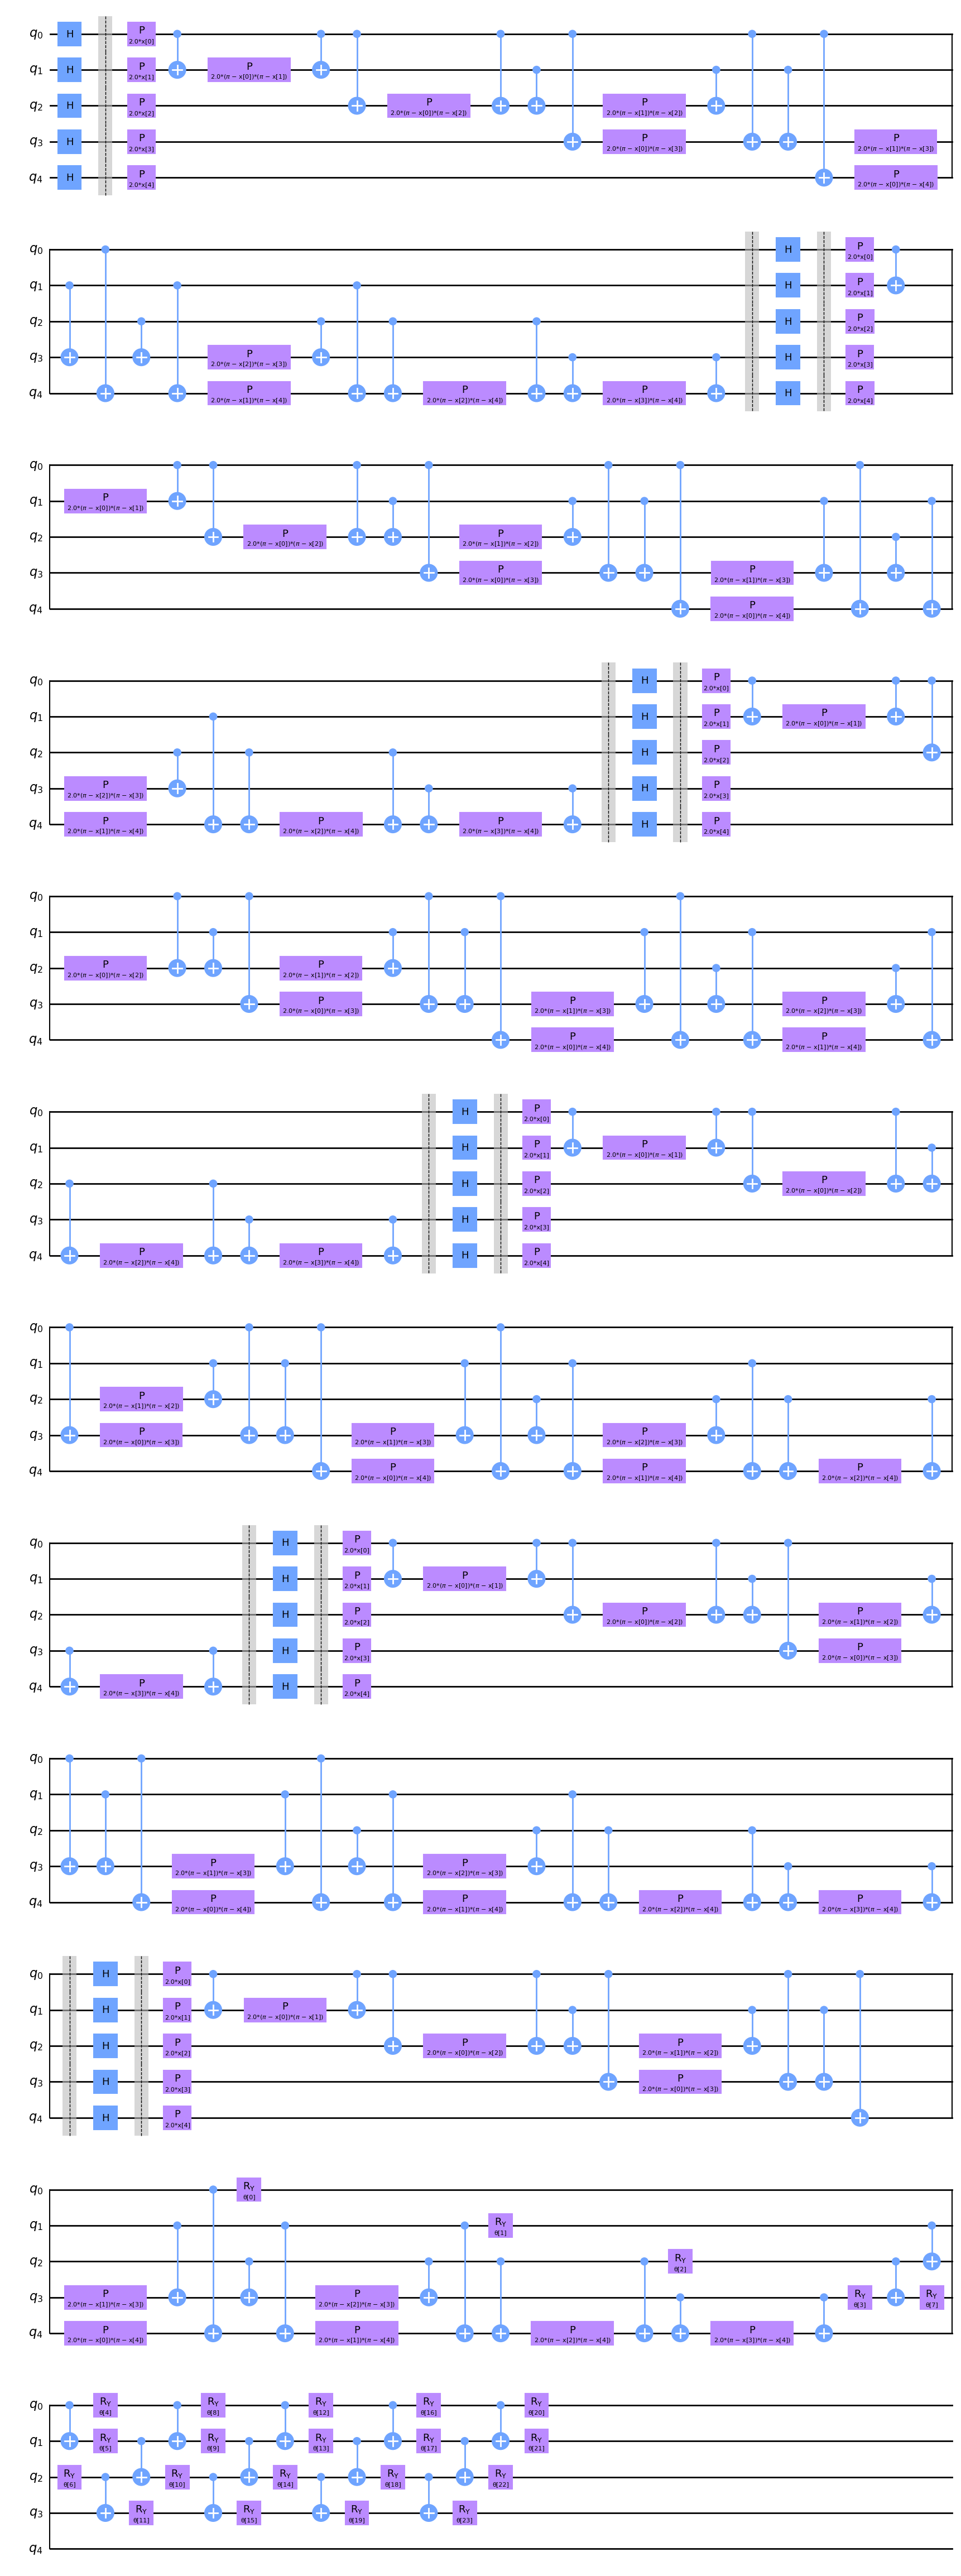

In [139]:
feature_map = ZZFeatureMap(feature_dimension=5, reps=6, insert_barriers=True)
ansatz = RealAmplitudes(4, reps=5)


circuit = feature_map.compose(ansatz) #DEPRECATED - combnine to compose
circuit.decompose().draw(output='mpl')

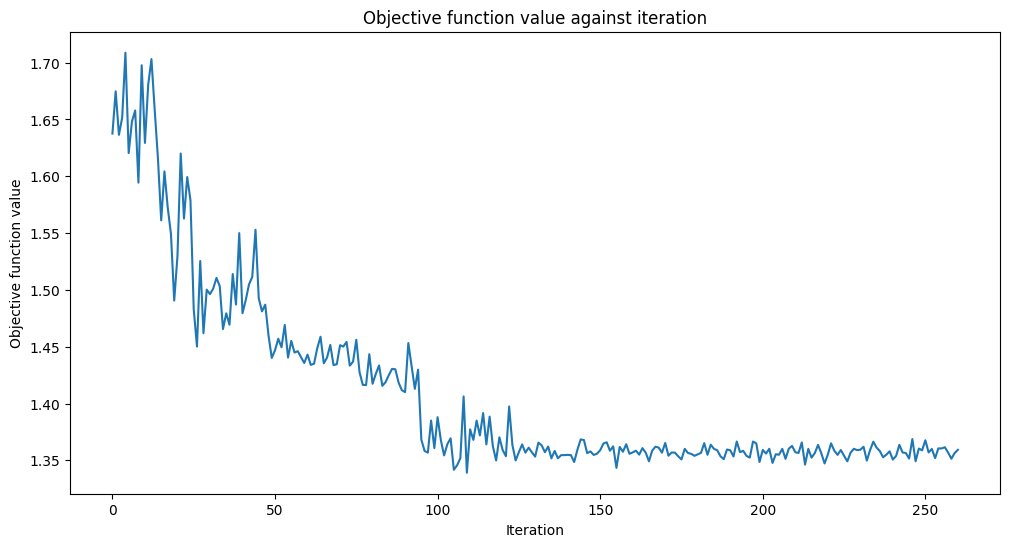

0.5178571428571429

In [140]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(x_train, y_onehot)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(x_train, y_onehot)



In [141]:
y_onehot_test = OneHotEncoder().fit_transform(y_test.values.reshape(-1,1))
vqc.score(x_test, y_onehot_test)

0.5526315789473685